<h1 style="font-size:32px; color:Black;">Step 7: Final Evaluation and Comparison</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score  # ✅ Correct import
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Final Evaluation and Comparison Function


Tuned Random Forest Evaluation:
RMSE: 360.85
R² Score: -0.36


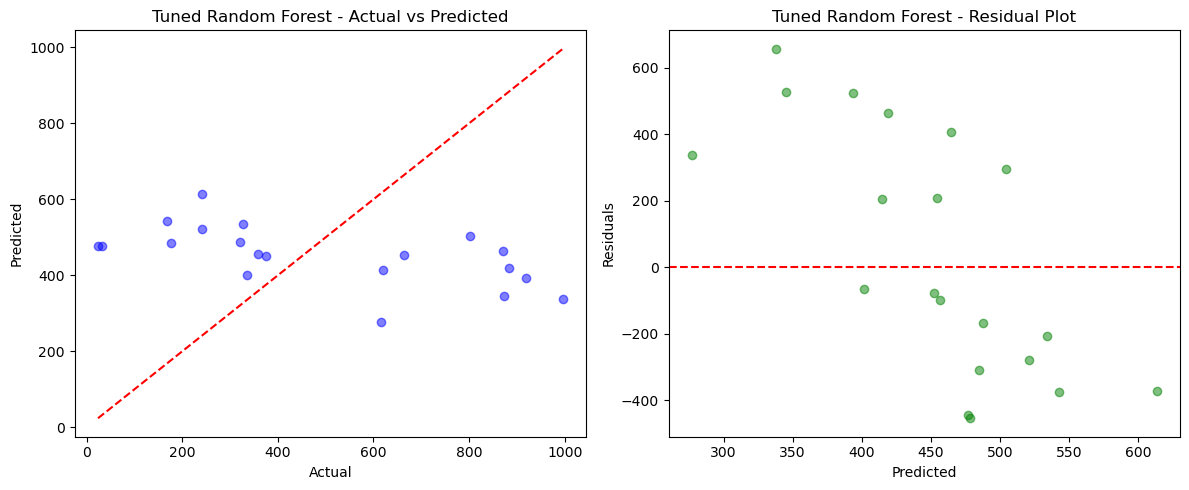

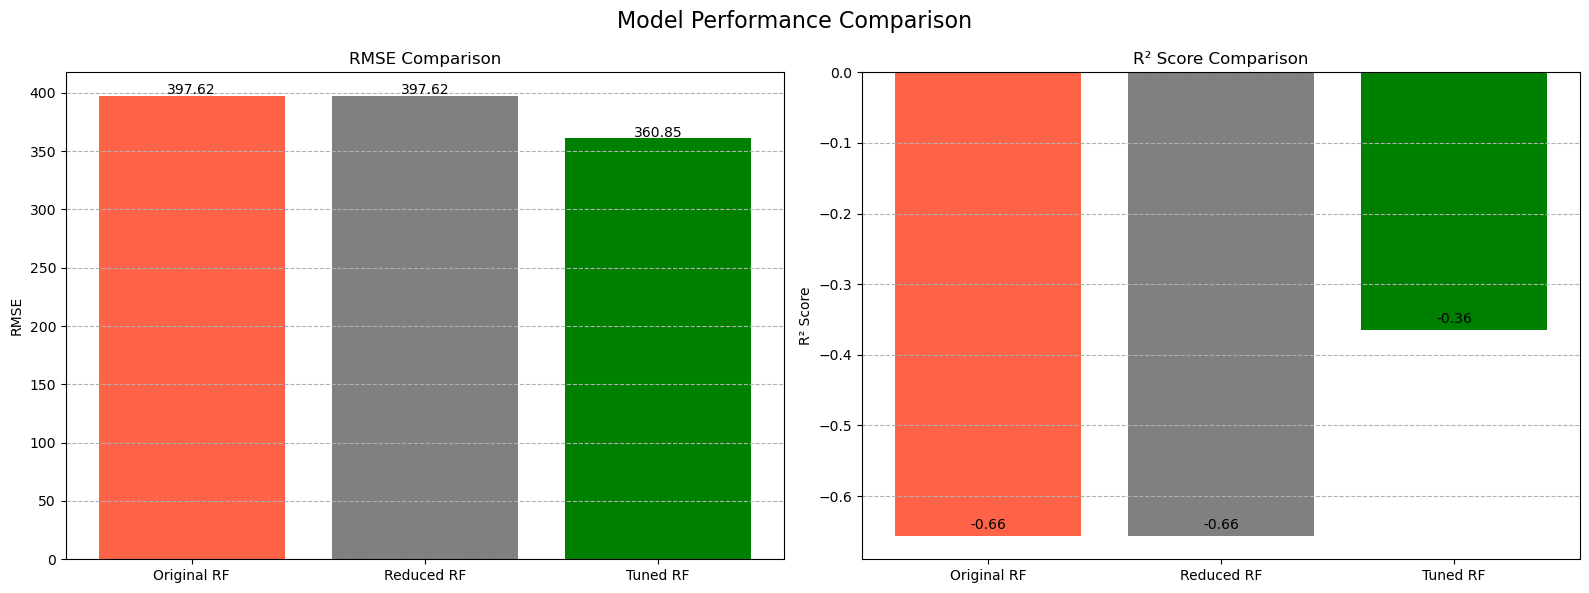

['tuned_random_forest_model.pkl']

In [5]:
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

# --- Evaluate model performance ---
def evaluate_model(name, y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    plt.figure(figsize=(12, 5))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")

    # Residuals
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residual Plot")

    plt.tight_layout()
    plt.savefig(f"{name.replace(' ', '_')}_evaluation_plot.png")
    plt.show()

    return rmse, r2

# --- Predict using tuned model ---
y_pred_tuned = best_rf.predict(X_test)
rmse_tuned, r2_tuned = evaluate_model("Tuned Random Forest", y_test, y_pred_tuned)

# --- Predict using original and reduced model if not already done ---
y_pred_rf = rf.predict(X_test)  # baseline model

# Fit reduced model and predict (if not already done earlier)
rf_reduced = RandomForestRegressor(random_state=42)
rf_reduced.fit(X_train, y_train)
y_pred_reduced = rf_reduced.predict(X_test)  # reduced feature model

# --- Calculate metrics ---
rmse_orig = root_mean_squared_error(y_test, y_pred_rf)
r2_orig = r2_score(y_test, y_pred_rf)

rmse_reduced = root_mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

# --- Comparison Plot ---
models = ['Original RF', 'Reduced RF', 'Tuned RF']
rmse_values = [rmse_orig, rmse_reduced, rmse_tuned]
r2_values = [r2_orig, r2_reduced, r2_tuned]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE Plot
axes[0].bar(models, rmse_values, color=['tomato', 'gray', 'green'])
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].grid(axis='y', linestyle='--')
for i, v in enumerate(rmse_values):
    axes[0].text(i, v + 1, f'{v:.2f}', ha='center')

# R² Score Plot
axes[1].bar(models, r2_values, color=['tomato', 'gray', 'green'])
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')
axes[1].grid(axis='y', linestyle='--')
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.suptitle("Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.savefig("Model_Performance_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Save the final tuned model (optional) ---
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')
